In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥ 1.0.1 is required
from packaging import version
import sklearn
print(sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt


1.4.1.post1


In [234]:
pd.set_option('display.max_columns', None)

In [2]:
solar = pd.read_csv('solar.csv')
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  9705 non-null   object 
 1   kwh        9705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 151.8+ KB


In [3]:
solar['timestamp'] = pd.to_datetime(solar['timestamp'], utc=True).dt.tz_convert('Europe/Brussels')
solar.head()

,timestamp,kwh
0,2023-03-11 16:00:10.160454+01:00,0.54
1,2023-03-11 17:00:10.217795+01:00,1.02
2,2023-03-11 18:00:10.284064+01:00,1.17
3,2023-03-11 19:00:10.224836+01:00,1.18
4,2023-03-11 20:00:10.201847+01:00,1.18


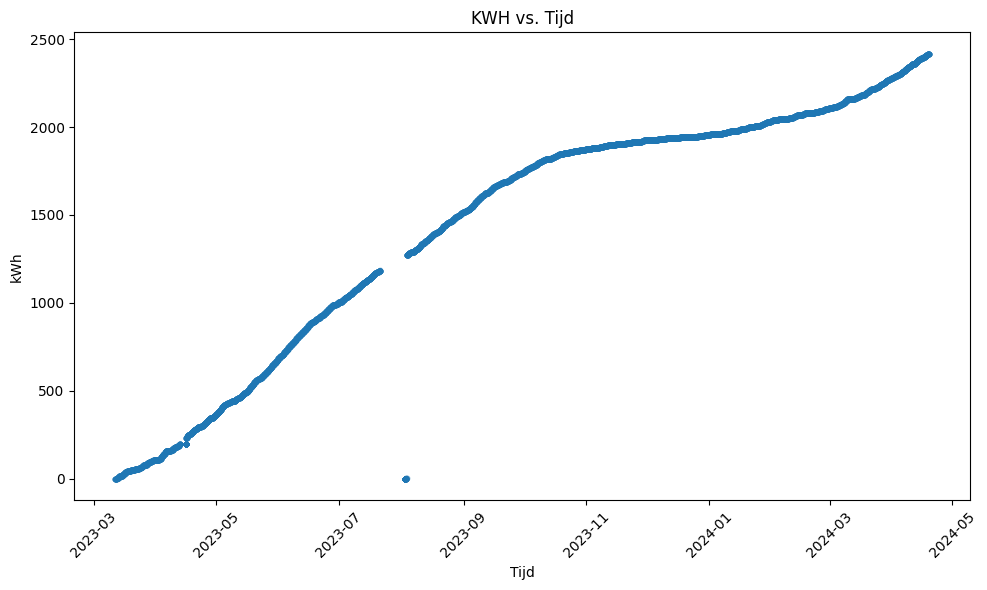

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(solar['timestamp'], solar['kwh'], alpha=0.5,s=10)
plt.xlabel('Tijd')
plt.ylabel('kWh')
plt.title('KWH vs. Tijd')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [5]:
solar.describe()

,kwh
count,9705.000000
mean,1401.190049
std,741.801205
min,0.000000
25%,772.572600
50%,1737.388200
75%,1964.015800
max,2417.478800


In [238]:
# Verwijder de fout gemeten waarden
solar = solar[(solar['timestamp'].dt.month <= 7) | (solar['kwh'] > 250) ]

# De kolom 'kwh' is gecumuleerd. Vind de werkelijke opbrengst per uur. 
solar['kwh_diff'] = solar['kwh'].diff()
solar['kwh_diff'].fillna(solar['kwh'],inplace=True)

solar.drop('kwh',axis=1,inplace=True)
solar.rename(columns={'kwh_diff':'kwh'}, inplace=True)

/var/folders/rz/0j044c_j4mv6n2k9c65gmtrw0000gp/T/ipykernel_3108/1610544437.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solar['kwh_diff'].fillna(solar['kwh'],inplace=True)


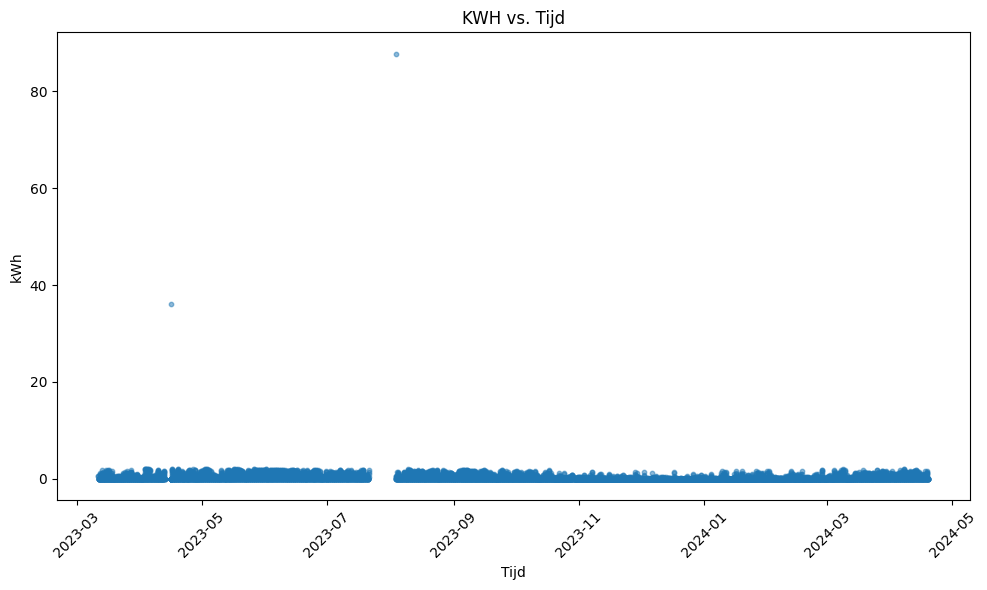

In [239]:
plt.figure(figsize=(10, 6))
plt.scatter(solar['timestamp'], solar['kwh'],alpha=0.5,s=10)
plt.xlabel('Tijd')
plt.ylabel('kWh')
plt.title('KWH vs. Tijd')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [240]:
# Verwijder die extreme waarden die niet realistisch zijn
solar = solar[solar['kwh'] < 20]

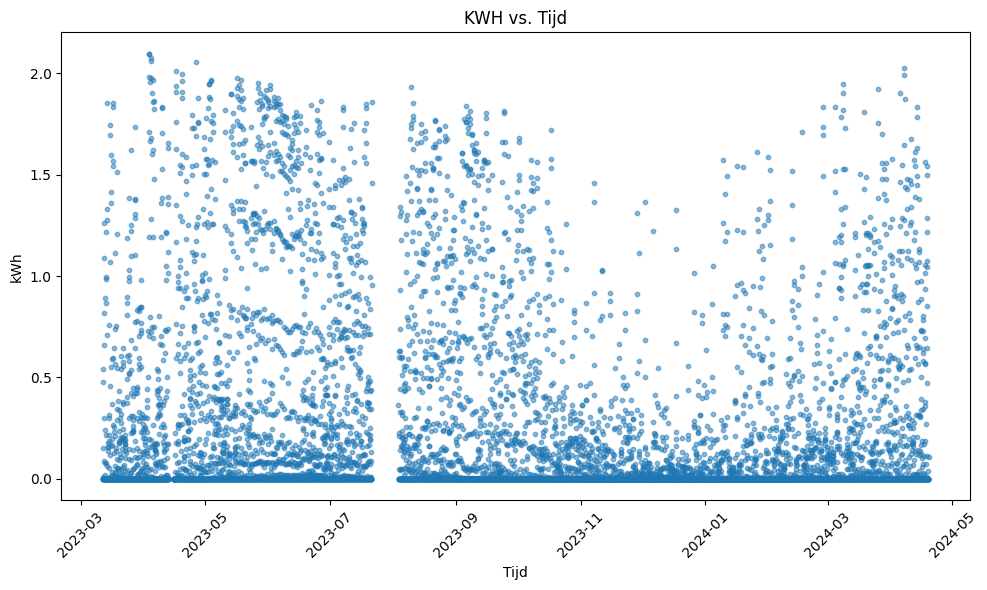

In [241]:
plt.figure(figsize=(10, 6))
plt.scatter(solar['timestamp'], solar['kwh'],alpha=0.5,s=10 )
plt.xlabel('Tijd')
plt.ylabel('kWh')
plt.title('KWH vs. Tijd')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [242]:
solar['Year'] = solar['timestamp'].dt.year
solar['Hour'] = solar['timestamp'].dt.hour
solar['Day'] = solar['timestamp'].dt.day
solar['Month'] = solar['timestamp'].dt.month

solar.drop('timestamp', axis=1, inplace=True)

solar.head()

,kwh,Year,Hour,Day,Month
0,0.54,2023,16,11,3
1,0.48,2023,17,11,3
2,0.15,2023,18,11,3
3,0.01,2023,19,11,3
4,0.00,2023,20,11,3


In [243]:
weather = pd.read_csv('./weather.csv')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39840 entries, 0 to 39839
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FID                          39840 non-null  object 
 1   the_geom                     39840 non-null  object 
 2   code                         39840 non-null  int64  
 3   timestamp                    39840 non-null  object 
 4   precip_quantity              6291 non-null   float64
 5   precip_range                 6417 non-null   float64
 6   temp                         39840 non-null  float64
 7   temp_min                     1660 non-null   float64
 8   temp_max                     1657 non-null   float64
 9   temp_grass_min               1189 non-null   float64
 10  wind_speed                   39827 non-null  float64
 11  wind_speed_unit              39840 non-null  int64  
 12  wind_direction               39414 non-null  float64
 13  wind_peak_speed 

In [244]:
weather['timestamp'] = pd.to_datetime(weather['timestamp'],utc=True).dt.tz_convert('Europe/Brussels')
weather.head()

,FID,the_geom,code,timestamp,precip_quantity,precip_range,temp,temp_min,temp_max,temp_grass_min,wind_speed,wind_speed_unit,wind_direction,wind_peak_speed,humidity_relative,weather_current,pressure,pressure_station_level,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness
0,synop_data.6418.2023-03-01 09:00:00+00,POINT (51.347375 3.201846),6418,2023-03-01 10:00:00+01:00,NaN,NaN,4.9,NaN,NaN,NaN,6.364,1,50.0,9.4,54.3,NaN,1029.7,1028.0,NaN,NaN,0.0
1,synop_data.6414.2023-03-01 09:00:00+00,POINT (50.90398 3.121692),6414,2023-03-01 10:00:00+01:00,NaN,NaN,2.1,NaN,NaN,NaN,4.743,1,44.7,7.5,73.7,NaN,1029.3,1025.9,NaN,NaN,NaN
2,synop_data.6407.2023-03-01 09:00:00+00,POINT (51.200341 2.887306),6407,2023-03-01 10:00:00+01:00,NaN,NaN,3.3,NaN,NaN,NaN,4.000,1,60.0,7.0,NaN,NaN,1029.6,1029.0,NaN,NaN,1.0
3,synop_data.6434.2023-03-01 09:00:00+00,POINT (50.980293 3.816003),6434,2023-03-01 10:00:00+01:00,NaN,NaN,1.6,NaN,NaN,-10.0,4.062,1,71.6,5.9,70.9,NaN,1029.4,1027.3,NaN,NaN,NaN
4,synop_data.6434.2023-03-01 10:00:00+00,POINT (50.980293 3.816003),6434,2023-03-01 11:00:00+01:00,NaN,NaN,3.0,NaN,NaN,NaN,4.570,1,56.0,7.6,60.8,NaN,1028.8,1026.7,NaN,NaN,NaN


In [245]:
weather['Year'] = weather['timestamp'].dt.year
weather['Hour'] = weather['timestamp'].dt.hour
weather['Day'] = weather['timestamp'].dt.day
weather['Month'] = weather['timestamp'].dt.month

weather.drop('timestamp', axis=1, inplace=True)

weather.head()

,FID,the_geom,code,precip_quantity,precip_range,temp,temp_min,temp_max,temp_grass_min,wind_speed,wind_speed_unit,wind_direction,wind_peak_speed,humidity_relative,weather_current,pressure,pressure_station_level,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness,Year,Hour,Day,Month
0,synop_data.6418.2023-03-01 09:00:00+00,POINT (51.347375 3.201846),6418,NaN,NaN,4.9,NaN,NaN,NaN,6.364,1,50.0,9.4,54.3,NaN,1029.7,1028.0,NaN,NaN,0.0,2023,10,1,3
1,synop_data.6414.2023-03-01 09:00:00+00,POINT (50.90398 3.121692),6414,NaN,NaN,2.1,NaN,NaN,NaN,4.743,1,44.7,7.5,73.7,NaN,1029.3,1025.9,NaN,NaN,NaN,2023,10,1,3
2,synop_data.6407.2023-03-01 09:00:00+00,POINT (51.200341 2.887306),6407,NaN,NaN,3.3,NaN,NaN,NaN,4.000,1,60.0,7.0,NaN,NaN,1029.6,1029.0,NaN,NaN,1.0,2023,10,1,3
3,synop_data.6434.2023-03-01 09:00:00+00,POINT (50.980293 3.816003),6434,NaN,NaN,1.6,NaN,NaN,-10.0,4.062,1,71.6,5.9,70.9,NaN,1029.4,1027.3,NaN,NaN,NaN,2023,10,1,3
4,synop_data.6434.2023-03-01 10:00:00+00,POINT (50.980293 3.816003),6434,NaN,NaN,3.0,NaN,NaN,NaN,4.570,1,56.0,7.6,60.8,NaN,1028.8,1026.7,NaN,NaN,NaN,2023,11,1,3


In [246]:
sunrise_sunset = pd.read_excel('./datasets/sunrise-sunset.xlsx')
sunrise_sunset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datum           731 non-null    datetime64[ns]
 1   Opkomst         731 non-null    object        
 2   Op ware middag  731 non-null    object        
 3   Ondergang       731 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 23.0+ KB


In [247]:
sunrise_sunset['datum'] = pd.to_datetime(sunrise_sunset['datum'])
sunrise_sunset['Year'] = sunrise_sunset['datum'].dt.year
sunrise_sunset['Day'] = sunrise_sunset['datum'].dt.day
sunrise_sunset['Month'] = sunrise_sunset['datum'].dt.month

sunrise_sunset['Opkomst'] = pd.to_datetime(sunrise_sunset['Opkomst'], format='%H:%M:%S')
sunrise_sunset['Opkomst Uur'] = sunrise_sunset['Opkomst'].dt.hour
sunrise_sunset['Opkomst Minuut'] = sunrise_sunset['Opkomst'].dt.minute
sunrise_sunset['Op ware middag'] = pd.to_datetime(sunrise_sunset['Op ware middag'], format='%H:%M:%S')
sunrise_sunset['Op ware middag Uur'] = sunrise_sunset['Op ware middag'].dt.hour
sunrise_sunset['Op ware middag Minuut'] = sunrise_sunset['Op ware middag'].dt.minute
sunrise_sunset['Ondergang'] = pd.to_datetime(sunrise_sunset['Ondergang'], format='%H:%M:%S')
sunrise_sunset['Ondergang Uur'] = sunrise_sunset['Ondergang'].dt.hour
sunrise_sunset['Ondergang Minuut'] = sunrise_sunset['Ondergang'].dt.minute

sunrise_sunset.drop('Opkomst',axis=1,inplace=True)
sunrise_sunset.drop('Op ware middag',axis=1,inplace=True)
sunrise_sunset.drop('Ondergang',axis=1,inplace=True)

sunrise_sunset.drop('datum', axis=1, inplace=True)

sunrise_sunset.head()

,Year,Day,Month,Opkomst Uur,Opkomst Minuut,Op ware middag Uur,Op ware middag Minuut,Ondergang Uur,Ondergang Minuut
0,2023,1,1,8,45,12,46,16,47
1,2023,2,1,8,45,12,46,16,48
2,2023,3,1,8,45,12,47,16,49
3,2023,4,1,8,44,12,47,16,51
4,2023,5,1,8,44,12,48,16,52


In [248]:
df = weather.merge(solar, how='left', on=['Year','Month','Day'	,'Hour'])
df = df.merge(sunrise_sunset, how='left', on=['Year','Month','Day'])

df.dropna(subset=['kwh'],inplace=True)

df.head()

,FID,the_geom,code,precip_quantity,precip_range,temp,temp_min,temp_max,temp_grass_min,wind_speed,wind_speed_unit,wind_direction,wind_peak_speed,humidity_relative,weather_current,pressure,pressure_station_level,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness,Year,Hour,Day,Month,kwh,Opkomst Uur,Opkomst Minuut,Op ware middag Uur,Op ware middag Minuut,Ondergang Uur,Ondergang Minuut
984,synop_data.6414.2023-03-11 15:00:00+00,POINT (50.90398 3.121692),6414,NaN,NaN,7.3,NaN,NaN,NaN,1.243,1,260.7,6.3,48.4,NaN,1011.9,1008.6,NaN,NaN,NaN,2023,16,11,3,0.54,7,6,12,53,18,40
985,synop_data.6407.2023-03-11 15:00:00+00,POINT (51.200341 2.887306),6407,NaN,NaN,6.3,NaN,NaN,NaN,3.000,1,230.0,6.0,NaN,NaN,1012.0,1011.3,NaN,NaN,6.0,2023,16,11,3,0.54,7,6,12,53,18,40
986,synop_data.6418.2023-03-11 15:00:00+00,POINT (51.347375 3.201846),6418,NaN,NaN,6.4,NaN,NaN,NaN,3.108,1,337.2,4.6,64.1,NaN,1012.0,1010.4,NaN,NaN,NaN,2023,16,11,3,0.54,7,6,12,53,18,40
987,synop_data.6434.2023-03-11 15:00:00+00,POINT (50.980293 3.816003),6434,NaN,NaN,7.4,NaN,NaN,NaN,1.337,1,265.1,5.2,52.0,NaN,1012.2,1010.1,NaN,NaN,NaN,2023,16,11,3,0.54,7,6,12,53,18,40
988,synop_data.6434.2023-03-11 16:00:00+00,POINT (50.980293 3.816003),6434,NaN,NaN,6.8,NaN,NaN,NaN,1.329,1,181.8,3.0,54.4,NaN,1011.9,1009.9,NaN,NaN,NaN,2023,17,11,3,0.48,7,6,12,53,18,40


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37568 entries, 984 to 40111
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FID                          37568 non-null  object 
 1   the_geom                     37568 non-null  object 
 2   code                         37568 non-null  int64  
 3   precip_quantity              5877 non-null   float64
 4   precip_range                 5993 non-null   float64
 5   temp                         37568 non-null  float64
 6   temp_min                     1548 non-null   float64
 7   temp_max                     1553 non-null   float64
 8   temp_grass_min               1106 non-null   float64
 9   wind_speed                   37555 non-null  float64
 10  wind_speed_unit              37568 non-null  int64  
 11  wind_direction               37151 non-null  float64
 12  wind_peak_speed              37543 non-null  float64
 13  humidity_relative  

In [250]:
df.drop('precip_quantity',axis=1, inplace=True)
df.drop('precip_range',axis=1, inplace=True)
df.drop('weather_current',axis=1, inplace=True)
df.drop('sun_duration_24hours',axis=1, inplace=True)
df.drop('short_wave_from_sky_24hours',axis=1, inplace=True)
df.drop('FID',axis=1, inplace=True)
df.drop('the_geom',axis=1, inplace=True)
df.drop('code',axis=1, inplace=True)
df.drop('temp_min',axis=1, inplace=True)
df.drop('temp_max',axis=1, inplace=True)
df.drop('temp_grass_min',axis=1, inplace=True)
df.drop('wind_speed_unit',axis=1, inplace=True)
df.drop('pressure',axis=1, inplace=True)
df.drop('wind_direction',axis=1, inplace=True)
df.drop('Year',axis=1, inplace=True)
df.drop('wind_speed',axis=1,inplace=True)
df.drop('wind_peak_speed',axis=1,inplace=True)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37568 entries, 984 to 40111
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    37568 non-null  float64
 1   humidity_relative       28176 non-null  float64
 2   pressure_station_level  37568 non-null  float64
 3   cloudiness              14544 non-null  float64
 4   Hour                    37568 non-null  int32  
 5   Day                     37568 non-null  int32  
 6   Month                   37568 non-null  int32  
 7   kwh                     37568 non-null  float64
 8   Opkomst Uur             37568 non-null  int32  
 9   Opkomst Minuut          37568 non-null  int32  
 10  Op ware middag Uur      37568 non-null  int32  
 11  Op ware middag Minuut   37568 non-null  int32  
 12  Ondergang Uur           37568 non-null  int32  
 13  Ondergang Minuut        37568 non-null  int32  
dtypes: float64(5), int32(9)
memory usage: 3.0

In [252]:
X, y = df.drop('kwh',axis=1), df['kwh']

In [253]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [254]:
numerical_ix = ['temp','cloudiness','humidity_relative','pressure_station_level']
categorical_ix = ['Opkomst Uur', 'Opkomst Minuut', 'Op ware middag Uur',
     'Op ware middag Minuut', 'Ondergang Uur', 'Ondergang Minuut','Month','Day','Hour']

In [255]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False))  

preprocessing = ColumnTransformer([
    ("num", num_pipeline, numerical_ix),
    ("cat", cat_pipeline, categorical_ix),
])

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lin_reg = LinearRegression()

lin_reg_model = make_pipeline(preprocessing, lin_reg)

lin_reg_model.fit(X_train, y_train)

y_test_predict = lin_reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_test_predict)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.19509733552869082


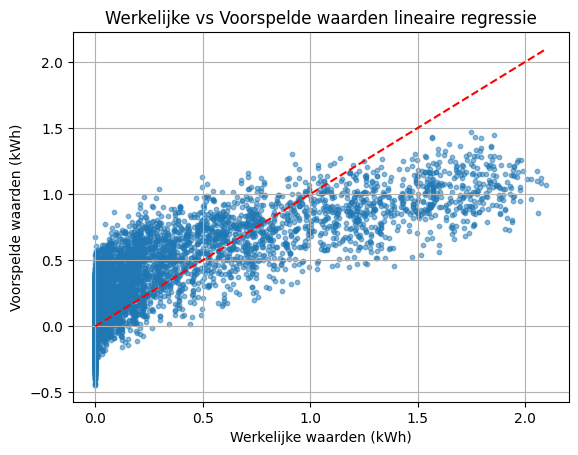

In [257]:
# Grafiek met werkelijke waarden tegenover voorspelde waarden
plt.scatter(y_test, y_test_predict, alpha=0.5,s=10)

# Zoveel mogelijk punten moeten op de diagonaal (rode stippenlijn) liggen
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') 

plt.xlabel('Werkelijke waarden (kWh)')
plt.ylabel('Voorspelde waarden (kWh)')
plt.title('Werkelijke vs Voorspelde waarden lineaire regressie')

plt.grid(True)

plt.show()

In [258]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_values = [0.01, 0.1, 1.0, 10.0, 100.0]
solver_values = ['cholesky','sag',]

ridge_reg_model = make_pipeline(
  preprocessing,
  Ridge(random_state=42)
)

param_grid = {
    'ridge__alpha': alpha_values,
    'ridge__solver': solver_values
}

grid_search = GridSearchCV(ridge_reg_model, param_grid, cv=3, scoring='neg_mean_absolute_error')

grid_search.fit(X_train, y_train)

grid_search.best_params_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

{'ridge__alpha': 100.0, 'ridge__solver': 'cholesky'}

In [259]:
ridge_reg_model = grid_search.best_estimator_

y_test_predict = ridge_reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_test_predict)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.19263552116371235


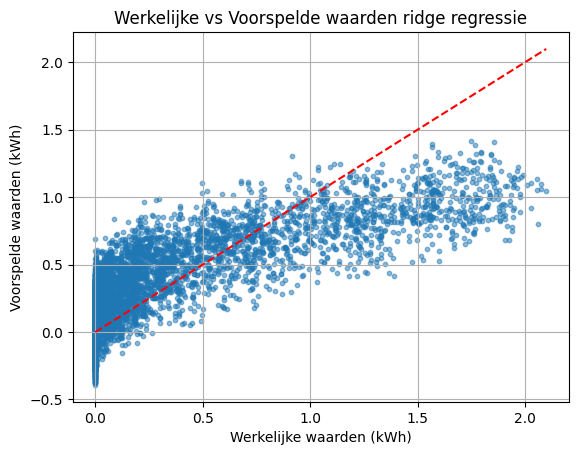

In [260]:
# Grafiek met werkelijke waarden tegenover voorspelde waarden
plt.scatter(y_test, y_test_predict, alpha=0.5,s=10)

# Zoveel mogelijk punten moeten op de diagonaal (rode stippenlijn) liggen
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') 

plt.xlabel('Werkelijke waarden (kWh)')
plt.ylabel('Voorspelde waarden (kWh)')
plt.title('Werkelijke vs Voorspelde waarden ridge regressie')

plt.grid(True)

plt.show()

In [261]:
from sklearn.linear_model import Lasso

alpha_values = [0.01, 0.1, 1.0, 10.0, 100.0]

lasso_reg_model = make_pipeline(
  preprocessing,
  Lasso()
)

param_grid = {
    'lasso__alpha': alpha_values,
}

grid_search = GridSearchCV(lasso_reg_model, param_grid, cv=3, scoring='neg_mean_absolute_error')

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'lasso__alpha': 0.01}

In [262]:
lasso_reg_model = grid_search.best_estimator_

y_test_predict = lasso_reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_test_predict)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.22280089992330768


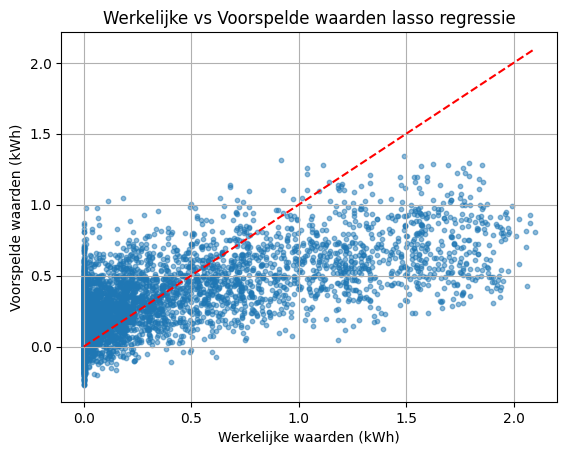

In [263]:
# Grafiek met werkelijke waarden tegenover voorspelde waarden
plt.scatter(y_test, y_test_predict, alpha=0.5,s=10)

# Zoveel mogelijk punten moeten op de diagonaal (rode stippenlijn) liggen
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') 

plt.xlabel('Werkelijke waarden (kWh)')
plt.ylabel('Voorspelde waarden (kWh)')
plt.title('Werkelijke vs Voorspelde waarden lasso regressie')

plt.grid(True)

plt.show()

In [264]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

linSVR_model = make_pipeline(preprocessing, LinearSVR(random_state=42))

param_grid = {'linearsvr__epsilon': [0.1,0.5,1.0,1.5,2.0,2.5,2.0,3.5]}

grid_search = GridSearchCV(linSVR_model, param_grid, cv=3, scoring='neg_mean_absolute_error')

grid_search.fit(X_train,y_train)

grid_search.best_params_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/V

{'linearsvr__epsilon': 0.1}

In [265]:
linSVR_model = grid_search.best_estimator_

y_test_predict = linSVR_model.predict(X_test)

mae = mean_absolute_error(y_test, y_test_predict)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.17855346800378252


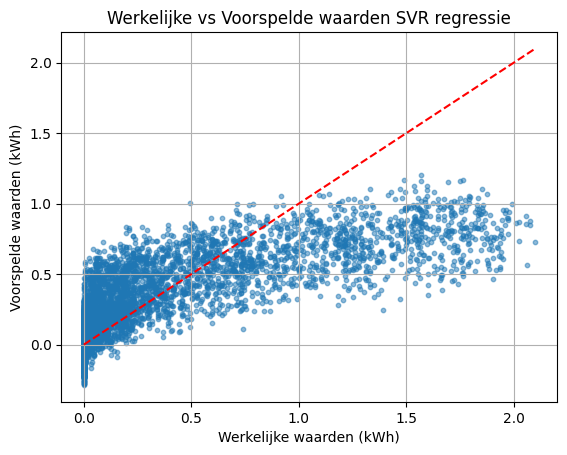

In [266]:
# Grafiek met werkelijke waarden tegenover voorspelde waarden
plt.scatter(y_test, y_test_predict, alpha=0.5,s=10)

# Zoveel mogelijk punten moeten op de diagonaal (rode stippenlijn) liggen
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') 

plt.xlabel('Werkelijke waarden (kWh)')
plt.ylabel('Voorspelde waarden (kWh)')
plt.title('Werkelijke vs Voorspelde waarden SVR regressie')

plt.grid(True)

plt.show()

In [267]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
'decisiontreeregressor__max_depth': [1,2,5,10,15],
    'decisiontreeregressor__min_samples_split': [2, 5, 10],
    'decisiontreeregressor__min_samples_leaf': [1,2 ,5,10],
}

tree_reg = make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))
grid_search = GridSearchCV(tree_reg,param_grid,cv=3,scoring='neg_mean_absolute_error')

grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

tree_reg_model = grid_search.best_estimator_

y_test_predict = tree_reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_test_predict)

print("Mean Absolute Error:", mae)

{'decisiontreeregressor__max_depth': 15, 'decisiontreeregressor__min_samples_leaf': 1, 'decisiontreeregressor__min_samples_split': 2}
Mean Absolute Error: 0.07475997301112665


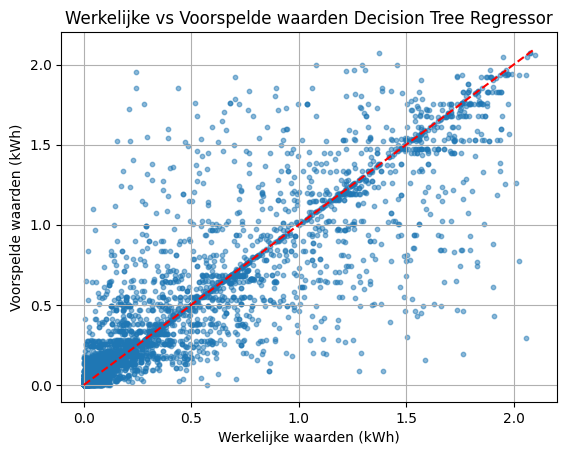

In [268]:
# Grafiek met werkelijke waarden tegenover voorspelde waarden
plt.scatter(y_test, y_test_predict, alpha=0.5,s=10)

# Zoveel mogelijk punten moeten op de diagonaal (rode stippenlijn) liggen
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') 

plt.xlabel('Werkelijke waarden (kWh)')
plt.ylabel('Voorspelde waarden (kWh)')
plt.title('Werkelijke vs Voorspelde waarden Decision Tree Regressor')

plt.grid(True)

plt.show()

In [269]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = make_pipeline(preprocessing,RandomForestRegressor(n_estimators=500,random_state=42))

rfr_model.fit(X_train,y_train)

y_test_predict = rfr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_test_predict)

print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.05698152907791176


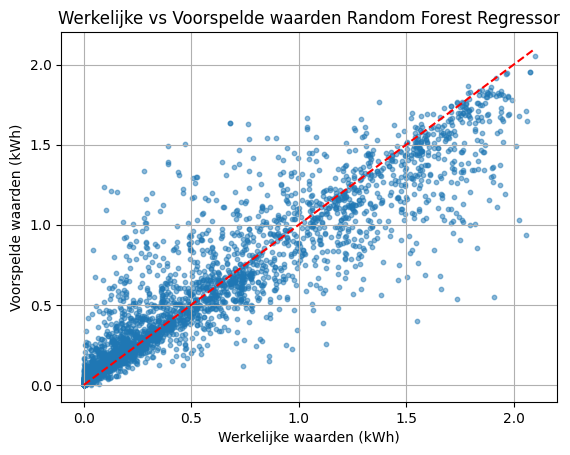

In [270]:
# Grafiek met werkelijke waarden tegenover voorspelde waarden
plt.scatter(y_test, y_test_predict, alpha=0.5,s=10)

# Zoveel mogelijk punten moeten op de diagonaal (rode stippenlijn) liggen
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') 

plt.xlabel('Werkelijke waarden (kWh)')
plt.ylabel('Voorspelde waarden (kWh)')
plt.title('Werkelijke vs Voorspelde waarden Random Forest Regressor')

plt.grid(True)

plt.show()

In [276]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = make_pipeline(preprocessing, GradientBoostingRegressor(
    learning_rate=0.05, n_estimators=500,max_depth=15,
    n_iter_no_change=10, random_state=42))

gbrt.fit(X_train, y_train)

y_test_predict = gbrt.predict(X_test)

mae = mean_absolute_error(y_test, y_test_predict)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.06056091380863469


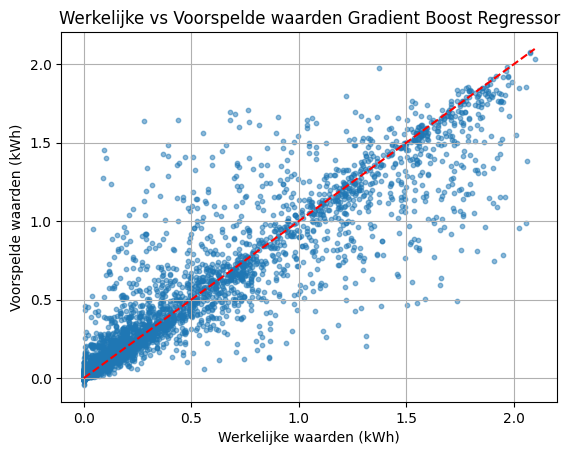

In [277]:
# Grafiek met werkelijke waarden tegenover voorspelde waarden
plt.scatter(y_test, y_test_predict, alpha=0.5,s=10)

# Zoveel mogelijk punten moeten op de diagonaal (rode stippenlijn) liggen
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') 

plt.xlabel('Werkelijke waarden (kWh)')
plt.ylabel('Voorspelde waarden (kWh)')
plt.title('Werkelijke vs Voorspelde waarden Gradient Boost Regressor')

plt.grid(True)

plt.show()

In [273]:
from sklearn.ensemble import StackingRegressor
from sklearn.svm import LinearSVR

stacking_reg = make_pipeline(preprocessing, StackingRegressor(estimators=[
  ('lr',LinearRegression()),
  ('ridge',Ridge(alpha= 100.0, solver='cholesky',random_state=42)),
  ('lasso',Lasso(alpha=0.01,random_state=42)),
  ('rf',RandomForestRegressor(n_estimators=500,random_state=42)),
  ('svr',LinearSVR(epsilon=0.1,random_state=42)),
],
final_estimator=RandomForestRegressor(n_estimators=500,random_state=43),
cv=5))

stacking_reg.fit(X_train,y_train)

y_test_predict = stacking_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_test_predict)

print("Mean Absolute Error:", mae)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/V

Mean Absolute Error: 0.05691469933457507


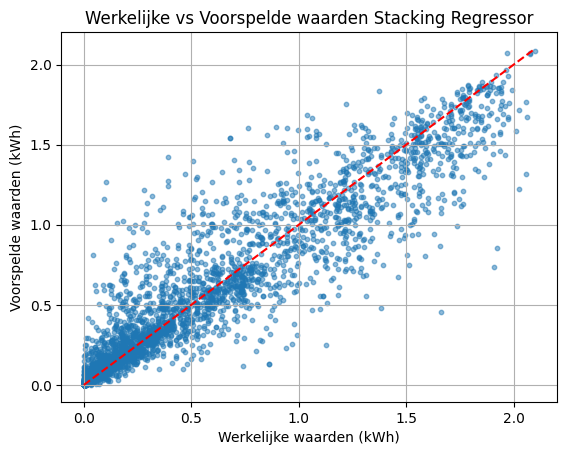

In [274]:
# Grafiek met werkelijke waarden tegenover voorspelde waarden
plt.scatter(y_test, y_test_predict, alpha=0.5,s=10)

# Zoveel mogelijk punten moeten op de diagonaal (rode stippenlijn) liggen
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') 

plt.xlabel('Werkelijke waarden (kWh)')
plt.ylabel('Voorspelde waarden (kWh)')
plt.title('Werkelijke vs Voorspelde waarden Stacking Regressor')

plt.grid(True)

plt.show()

In [275]:
import joblib

joblib.dump(stacking_reg, "kwh_voorspellingen_model.pkl")

['kwh_voorspellingen_model.pkl']